Source : https://www.kaggle.com/code/hirzif/supermarket-sales-eda/notebook

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("sales.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


# Data Wrangling

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   object        
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [24]:
from datetime import datetime
data["datetime"] = pd.to_datetime(data["Date"]+ " "+data["Time"],format="%m/%d/%Y %H:%M")# make datetime column 

In [25]:
data.duplicated().sum()

np.int64(0)

In [26]:
data.describe(include="all")

,invoice_id,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,datetime
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000,1000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN,NaN
top,849-09-3807,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905,15.379369,6.97270,2019-02-14 15:30:27.480000
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905,0.508500,4.00000,2019-01-01 10:39:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905,5.924875,5.50000,2019-01-24 17:58:45
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905,12.088000,7.00000,2019-02-13 17:37:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905,22.445250,8.50000,2019-03-08 15:29:30
max,NaN,NaN,NaN,NaN,NaN,NaN,99.960000,10.000000,49.650000,1042.650000,NaN,NaN,NaN,993.00000,4.761905,49.650000,10.00000,2019-03-30 20:37:00


# Exploratory Data Analysis & Data Visualization


## Q : How much Profit for Each Branch ?


In [8]:
profit_each_branch = data.groupby(by="Branch",as_index = False).agg({"gross income":["sum","mean","max"]})
profit_each_branch.columns = ["branch","Total","Average","max"]
profit_each_branch.head()

,branch,Total,Average,max
0,A,5057.1605,14.874001,49.49
1,B,5057.0320,15.232024,48.69
2,C,5265.1765,16.052367,49.65


C:\Users\andi\AppData\Local\Temp\ipykernel_15336\3512802817.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Total",x="branch",data=profit_each_branch.sort_values(by="Total",ascending=False),palette=colors,ax=ax[0])
C:\Users\andi\AppData\Local\Temp\ipykernel_15336\3512802817.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Average",x="branch",data=profit_each_branch.sort_values(by="Average",ascending=False),palette=colors,ax=ax[1])
C:\Users\andi\AppData\Local\Temp\ipykernel_15336\3512802817.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


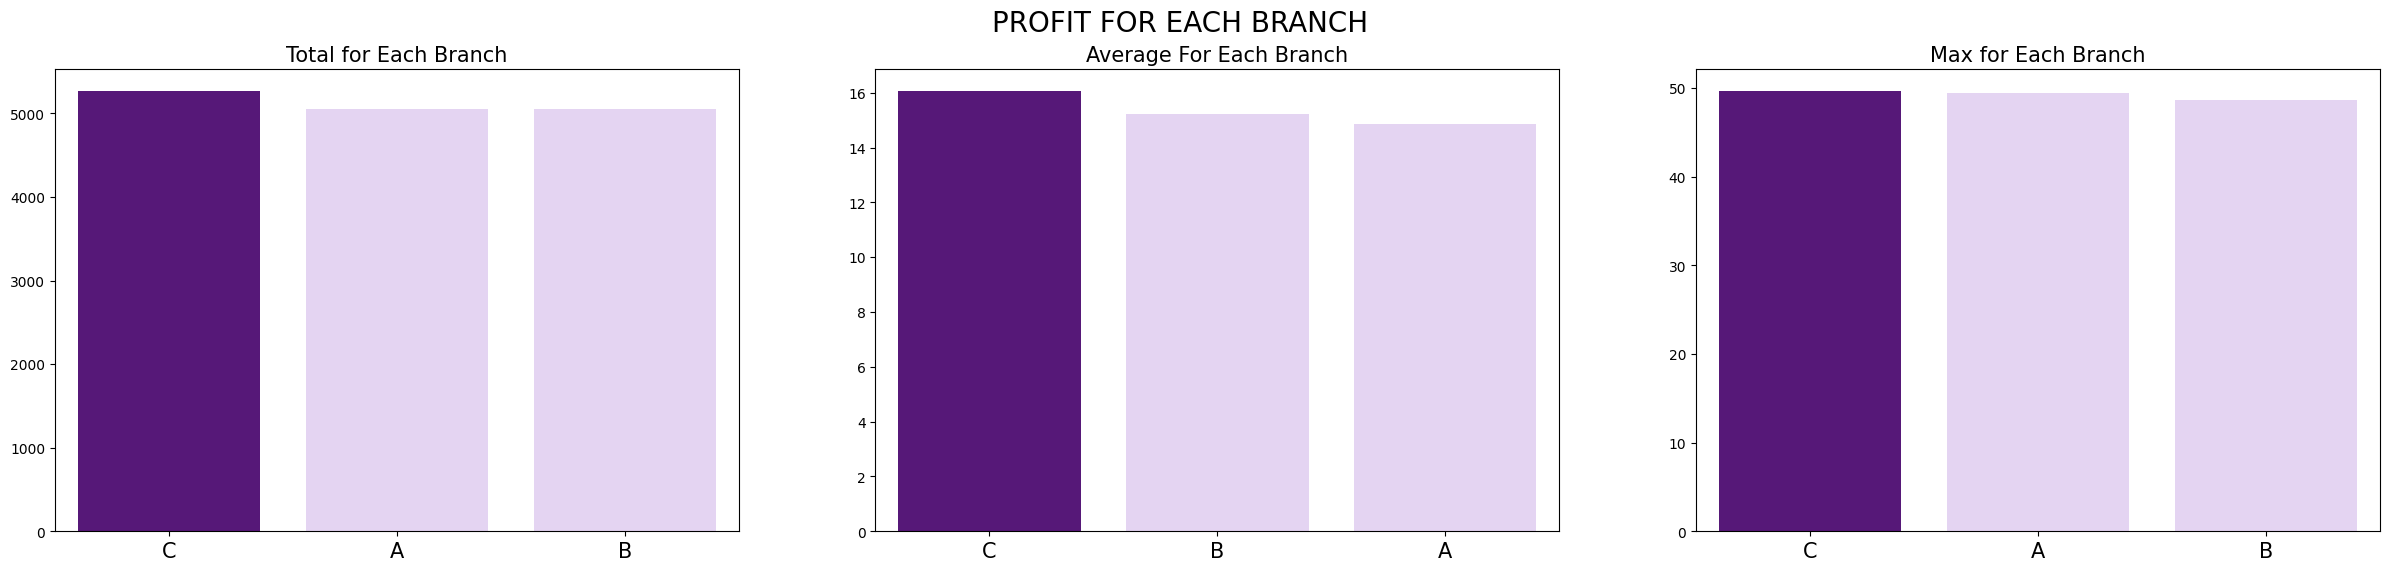

In [9]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(30,6))
colors=["#5B0888", "#E5CFF7", "#E5CFF7"]

sns.barplot(y="Total",x="branch",data=profit_each_branch.sort_values(by="Total",ascending=False),palette=colors,ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Total for Each Branch",loc="center",fontsize=15)
ax[0].tick_params(axis='x',labelsize=15)

sns.barplot(y="Average",x="branch",data=profit_each_branch.sort_values(by="Average",ascending=False),palette=colors,ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Average For Each Branch",loc="center",fontsize=15)
ax[1].tick_params(axis='x',labelsize=15)

sns.barplot(y="max",x="branch",data=profit_each_branch.sort_values(by="max",ascending=False),palette=colors,ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Max for Each Branch",fontsize=15)
ax[2].tick_params(axis='x',labelsize=15)

plt.suptitle("PROFIT FOR EACH BRANCH",fontsize=20)
plt.show()

## Q: Which Product does have highest profit ?

In [10]:
data_product_profit = data.groupby(by="Product line",as_index=False).agg({"gross income" : ["mean","sum"]})
data_product_profit.columns = ["product","average","total"]
data_product_profit

,product,average,total
0,Electronic accessories,15.220597,2587.5015
1,Fashion accessories,14.528062,2585.9950
2,Food and beverages,15.365310,2673.5640
3,Health and beauty,15.411572,2342.5590
4,Home and lifestyle,16.030331,2564.8530
5,Sports and travel,15.812630,2624.8965


C:\Users\andi\AppData\Local\Temp\ipykernel_15336\2492020240.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="average",y="product",data=data_product_profit.sort_values(by="average",ascending=False),palette=color,ax=ax[0])
C:\Users\andi\AppData\Local\Temp\ipykernel_15336\2492020240.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total",y="product",data=data_product_profit.sort_values(by="total",ascending=False),palette=color,ax=ax[1])


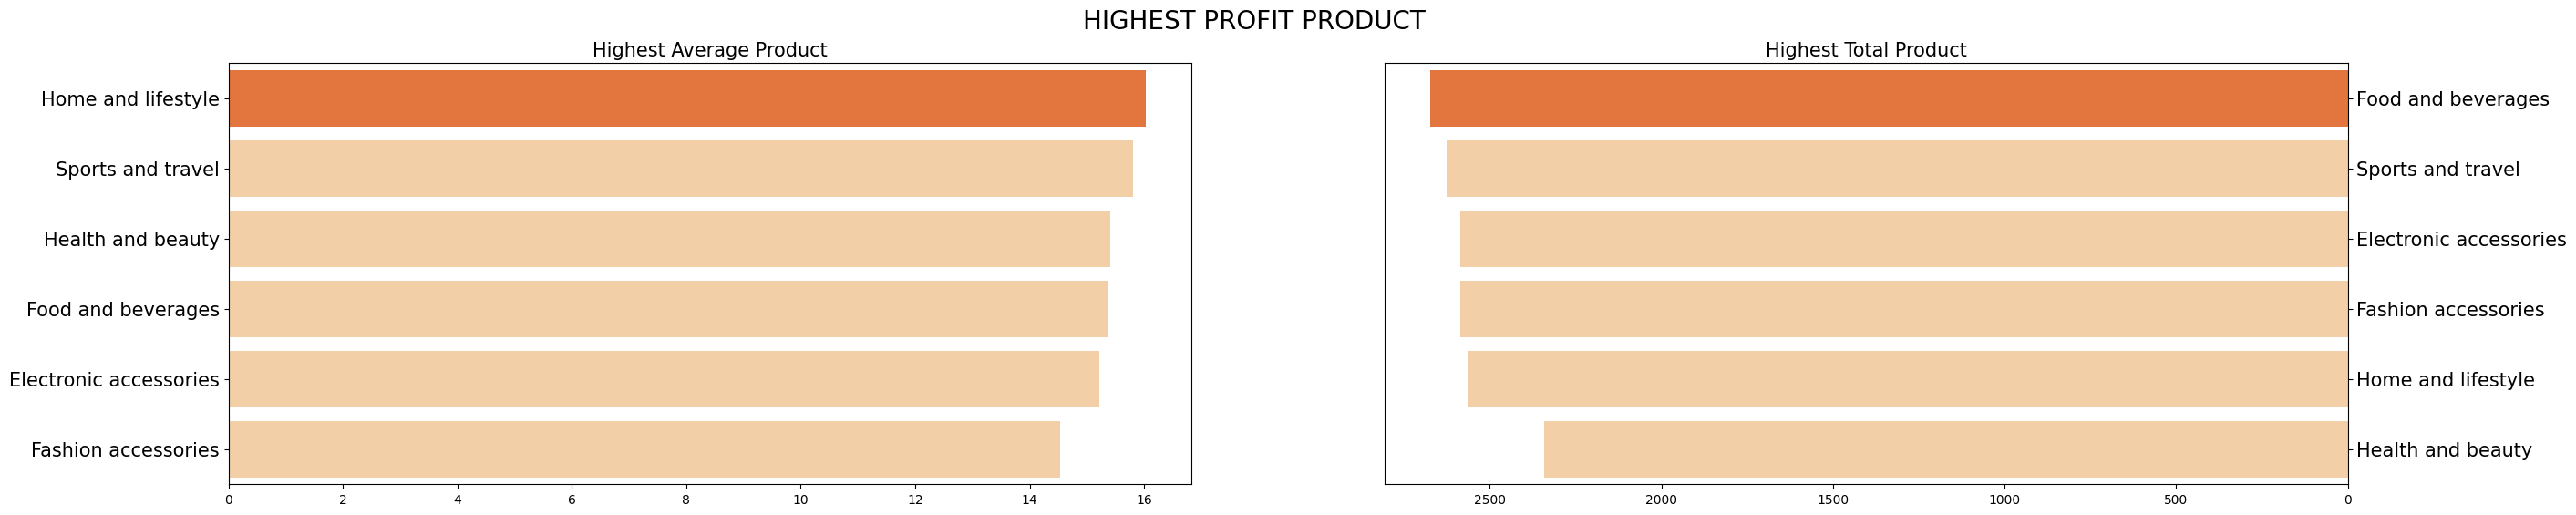

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(30,6))
color = ["#FF6C22","#FFD099","#FFD099","#FFD099","#FFD099","#FFD099"]

sns.barplot(x="average",y="product",data=data_product_profit.sort_values(by="average",ascending=False),palette=color,ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("Highest Average Product",loc="center",fontsize=15)
ax[0].tick_params(axis="y",labelsize=15)

sns.barplot(x="total",y="product",data=data_product_profit.sort_values(by="total",ascending=False),palette=color,ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("Highest Total Product",loc="center",fontsize=15)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis="y",labelsize=15)

plt.suptitle("HIGHEST PROFIT PRODUCT",fontsize=20)
plt.show()

## Q:How about  costomer demographics ?

### - Based On Gender

In [12]:
data.rename(columns ={"Invoice ID":"invoice_id"},inplace=True)
data

,invoice_id,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,datetime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2019-01-29 13:46:00
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2019-03-02 17:16:00
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,2019-02-09 13:22:00
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,2019-02-22 15:33:00


In [13]:
gender_data = data.groupby(by="Gender").invoice_id.nunique().sort_values(ascending=False).reset_index()
gender_data

,Gender,invoice_id
0,Female,501
1,Male,499


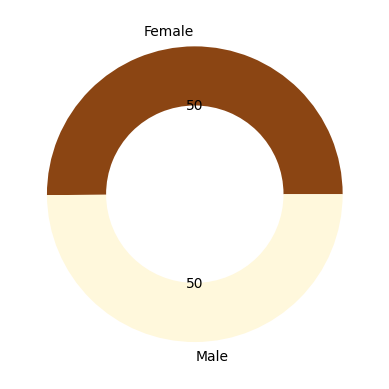

In [14]:
plt.pie(
    x=gender_data["invoice_id"],
    labels=gender_data["Gender"],
    autopct="%.0f",
    colors=('#8B4513', '#FFF8DC'),
    wedgeprops={'width':0.4}
)
plt.show()

### - Based On City

In [15]:
city_data = data.groupby(by="City").invoice_id.nunique().sort_values(ascending=False).reset_index()
city_data

,City,invoice_id
0,Yangon,340
1,Mandalay,332
2,Naypyitaw,328


C:\Users\andi\AppData\Local\Temp\ipykernel_15336\1638487274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_data["invoice_id"],x=city_data["City"],palette=color)


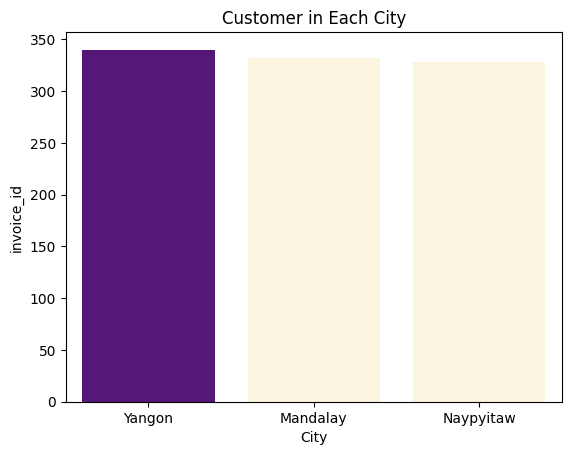

In [16]:
color= ('#5B0888','#FFF8DC','#FFF8DC')
sns.barplot(y=city_data["invoice_id"],x=city_data["City"],palette=color)
plt.title("Customer in Each City")
plt.show()

In [17]:
data_gender_city = data.groupby(by=["City","Gender"]).invoice_id.nunique().reset_index()
data_gender_city

,City,Gender,invoice_id
0,Mandalay,Female,162
1,Mandalay,Male,170
2,Naypyitaw,Female,178
3,Naypyitaw,Male,150
4,Yangon,Female,161
5,Yangon,Male,179


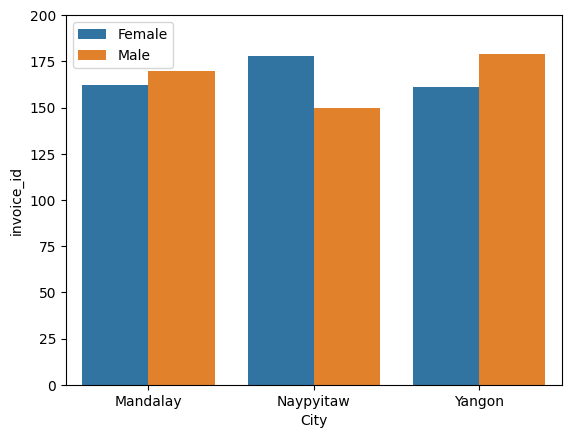

In [18]:
sns.barplot(data=data_gender_city,x="City",y="invoice_id",hue="Gender",errorbar=None)
plt.legend(loc="upper left")
plt.ylim(0,200)
plt.show()

## Gross Income and Number of Orders Per Months

In [19]:
monthly_data = data.resample(rule='m', on="datetime").agg({"invoice_id":"nunique","gross income":"sum"})
monthly_data.index = monthly_data.index.strftime("%B")
monthly_data = monthly_data.reset_index()
monthly_data.rename(columns={"invoice_id":"total_order"},inplace=True)
monthly_data

C:\Users\andi\AppData\Local\Temp\ipykernel_15336\1542094846.py:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample(rule='m', on="datetime").agg({"invoice_id":"nunique","gross income":"sum"})


,datetime,total_order,gross income
0,January,352,5537.708
1,February,303,4629.494
2,March,345,5212.167


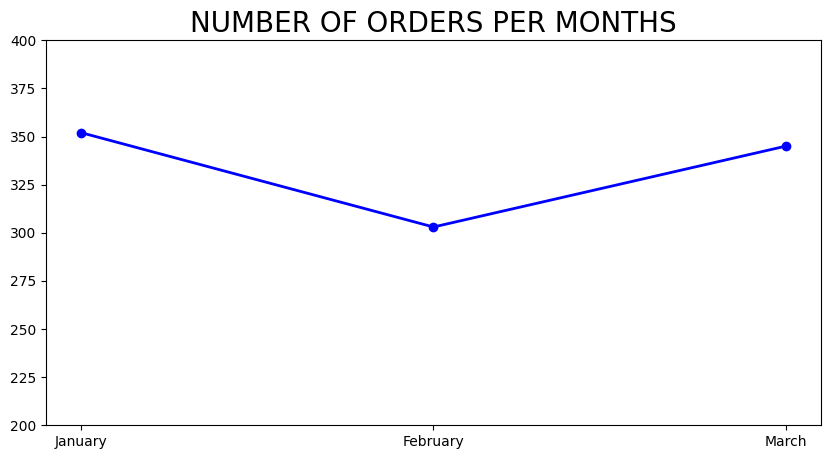

In [20]:
plt.figure(figsize=(10,5))
plt.plot(monthly_data["datetime"],monthly_data["total_order"],marker="o",linewidth=2,color="blue")
plt.title("NUMBER OF ORDERS PER MONTHS",fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(200,400)
plt.show()

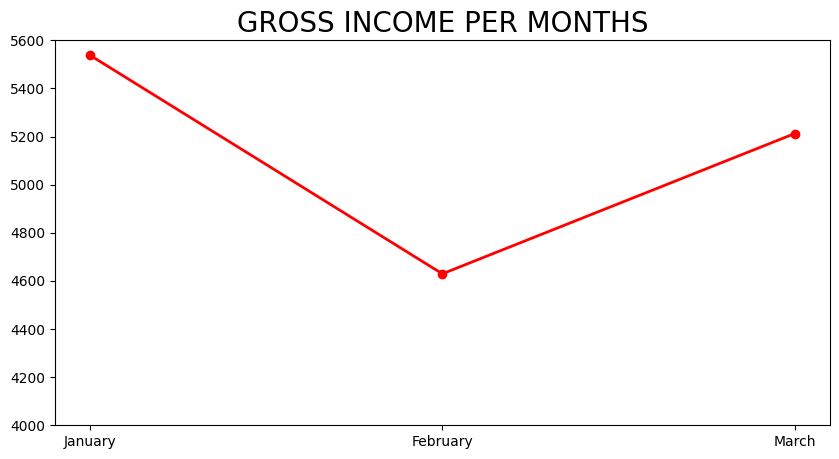

In [21]:
plt.figure(figsize=(10,5))
plt.plot(monthly_data["datetime"],monthly_data["gross income"],marker="o",linewidth=2,color="red")
plt.title("GROSS INCOME PER MONTHS",fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(4000,5600)
plt.show()

## Correlation

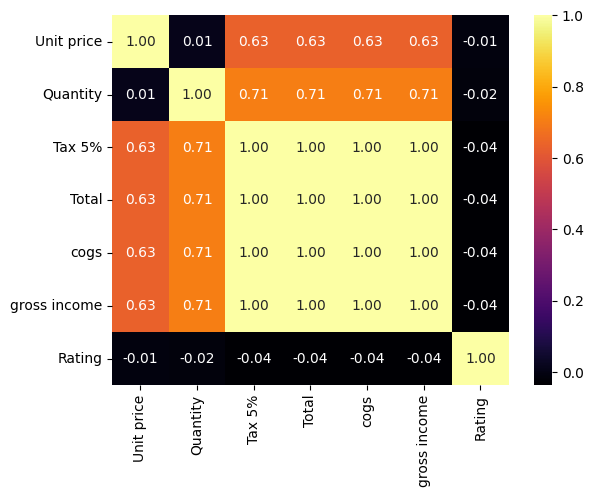

In [22]:
datacor = data.drop(["invoice_id","Branch","City","Customer type","Gender","Product line","Payment","Date","Time","gross margin percentage","datetime"],axis=1)
sns.heatmap(datacor.corr(),annot=True,fmt=".2f",cmap="inferno")
plt.show()